## Analyzing Popular App Categories On Google Playstore
In this project, our goal is to figure out what types of apps tends to be popular on the google playstore. We work for a company
that makes free apps and earn money thore ads. By understanding which app categories are in high demand, we can help our developer create apps that attract more user and generate more revenue. We'll analyze data on googleplay store to dentify the pattern and preference among the users. This way, we can make smarter decisions about the kind of apps we develop. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the dataset into pandas dataframe object 
android_df = pd.read_csv("googleplaystore.csv")

In [3]:
# explore the data using pandas method
android_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
android_df.shape

(10841, 13)

In [5]:
android_df["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [6]:
# data cleaning
android_df[android_df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
android_df[android_df["Category"] == "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [8]:
clean_lst = ['Life Made WI-Fi Touchscreen Photo Frame', "LIFESTYLE", '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', "LIFESTYLE", 'February 11, 2018',
        '1.0.19', '4.0 and up']
clean_lst

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'LIFESTYLE',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [9]:
android_df[android_df["Category"] == "1.9"] = clean_lst

In [10]:
android_df["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [11]:
app_count = android_df["App"].value_counts()
app_count

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64

In [12]:
app_count[app_count > 1]

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: count, Length: 798, dtype: int64

In [13]:
"Instagram" in app_count[app_count > 1].index

True

### Removing Duplicates Enteries

if we explore the google playstore data set long enough, We'll find that some apps have more than one entry. For instance the application instagram have four enteries.

In [14]:
android_df[android_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [15]:
# number of duplicate app
android_df.duplicated(subset = ["App"], keep=False).sum()

1979

In [16]:
# Check the duplicate row base on the app
duplicate_app_df = android_df[android_df.duplicated(subset = ["App"], keep=False)]

duplicate_app_df[duplicate_app_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [17]:
# number of duplicate app
num_duplicate_app = duplicate_app_df["App"].nunique()
num_duplicate_app

798

We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate enteries and keep only one entery per app. One thing we could do is remove the duplicate raws randomly. but we could propably find the better way.

if we could examine the row we printed the two cells above for the instagram app, the main difference happens on the fourth position of each row, which correspond the number of reviews. The different number show that the data was collect at different time. We can use to build a criterion for keeping the rows. we won't remove rows randomly, rather we will keep the rows that have the highest number of reviews, the more relaible the ratings. 

## two Parts

let's start building the distionary

In [18]:
# group by "app" and get max number of review for each app
review_max = android_df.groupby("App")["Reviews"].max()

In [19]:
review_max["Instagram"]

'66577446'

In [20]:
review_max

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

Now, lets use the review_max dictionary to remove the duplicates. For the duplicates cases, We'll only keep the enteries with the highest number of reviews. In the code cell below:

1. We start by initialing two empty list, android_clean and already_added
2. We loop through the android dataset, and for every iteration:
      . We isolate the name of the app and the number of reviews.
      . We add the current row (App) to the android_clean list, and the app name (name) to the already added list if:
             . the number of review of the current app matches the number of review of that app as described in the review_max dictionary
             . the name of the app is not already in the already_added list. We need to add this supplementary condtiionto account for those case where the highest number of review of a duplicate app is the samne for more than one entry (For Example: the box app has three enteries and the number of review is the same). If we just check for review_max[name] == n_reviews. We'll still end up with duplicate enteries for some apps.

In [21]:
# dataframe loop
# for index, row in android_df.iterrows():
#     if row["App"] == "Instagram":
#         print(row["App"], row["Reviews"])

In [22]:
# android_clean = []

# for index, row in android_df.iterrows():
#     name = row["App"]
#     n_review = row["Reviews"]
#     if (review_max[name] == n_review):
#         android_clean.append(row)

In [23]:
# len(android_clean)

In [24]:
# create a empty list to stored clean data
android_clean = []

# create a empty list to keep track of already added app
already_added = []

# iterate through each row in the dataframe
for index, row in android_df.iterrows():
    name = row["App"]
    n_review = row["Reviews"]

# Check if the current app has the maximum number or review and has not been added before 
    if (review_max[name] == n_review) and (name not in already_added):
        android_clean.append(row)  
        already_added.append(name)

In [25]:
android_clean = pd.DataFrame(android_clean)
android_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
            
    check = set(lst)
    
    if False in check:
        return False
    else:
        return True

In [27]:
is_english("Instagram")

True

In [28]:
is_english("💎 I'm rich ")

False

## Part Two
To minimize the impact of data loss, w'll only remove an app if its name has more than three non-ASCII character:

In [29]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
            
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

In [30]:
is_english("💎 I'm rich ")

True

In [31]:
android_english = android_clean[android_clean["App"].apply(is_english)]

In [32]:
android_english

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Isolating the free app
As we mention in the introduction, we only build apps that are free to download and install and our main source of revenue consist of in-app ads. Our dataset contain both free and non-free apps, and We'll need to isolate only the free apps for our analysis. Below we isolate the free apps for both our datasets 

In [33]:
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
android_final = android_english[android_english["Price"] == "0"]
android_final

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Most common apps by genre

In [35]:
android_final["Category"].value_counts(normalize = True)*100

Category
FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
A

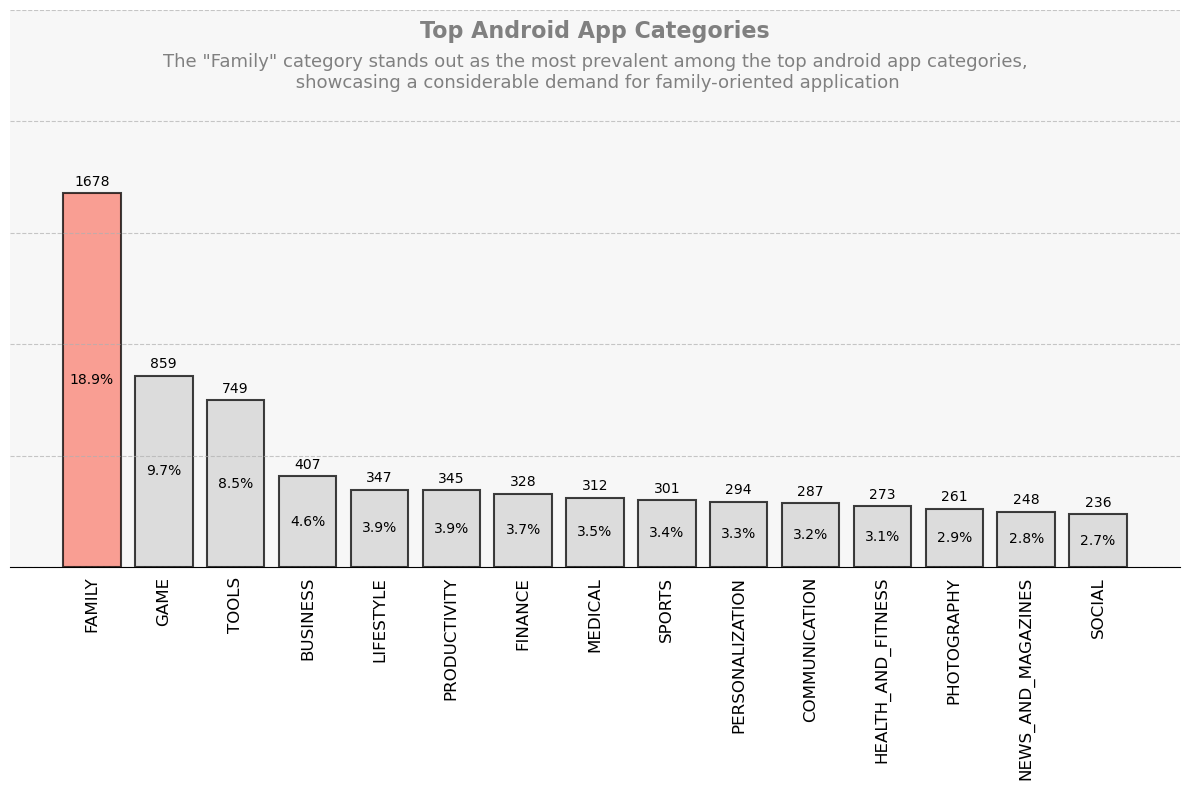

In [36]:
#data
categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts().values[:15]
percentage = round(android_final["Category"].value_counts(normalize = True)*100, 1)[:15]

#create stylish bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(categories, counts, color="lightgray",alpha=0.75, edgecolor="black", linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="")
plt.xticks(fontsize = 12)
plt.yticks(range(0, 3000, 500), [], fontsize = 12)
plt.tick_params(bottom = 0, left = 0)

#find the category with the highest count
max_count_categories = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_categories)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

#adding data labels and percentage inside each bars
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, "%d" % int(height), ha = "center", va = "bottom", fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha = "center", va = "center", fontsize=10, color = "black")
    
#adding the background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#adding chart title inside plot
plt.text(0.5, 0.95, "Top Android App Categories", horizontalalignment = "center", fontsize = 16,
         transform = plt.gca().transAxes, color = "gray", fontweight = "bold")

#adding conclusion in the chart
plt.text(0.5, 0.86, 'The "Family" category stands out as the most prevalent among the top android app categories,\n showcasing a considerable demand for family-oriented application', horizontalalignment = "center", fontsize = 13, transform = plt.gca().transAxes, color = "gray")

#Remove Spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

#ax.set yticklables ([])
plt.tight_layout()

#plt.show()
plt.savefig("Top Android App Categories.png")

## Most Popular Apps By Genre On Google Play
For the google play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install number donot seem precise enough, we can see that most values are open ended (100+, 1000+, 5000+, etc)   

In [37]:
android_final["Installs"].value_counts(normalize = True)*100

Installs
1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: proportion, dtype: float64

In [38]:
android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)
android_final["Installs_int"]

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4084\1898293556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace("+","").astype(int)


0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [39]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

Installs_int
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: count, dtype: int64

In [40]:
install_frq_per = round(android_final["Installs_int"].value_counts(normalize = True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per

Installs_int
1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: proportion, dtype: float64

In [41]:
#alphanumaric units
def alphanumeric_unit(value):
    if value >= 1e9:
        return f'{value / 1e9: .0f}B'
    elif value >= 1e6:
        return f'{value / 1e6: .0f}M'
    elif value >= 1e3:
        return f'{value / 1e3: .0f}K'
    else:
        return f'{value: .0f}'

In [42]:
alphanumeric_unit(1000000000)

' 1B'

In [43]:
install_frq.index = install_frq.index.map(alphanumeric_unit)
install_frq

Installs_int
 1K       745
 5K       400
 10K      904
 50K      423
 100K    1024
 500K     494
 1M      1395
 5M       606
 10M      932
 50M      203
 100M     188
 500M      24
 1B        20
Name: count, dtype: int64

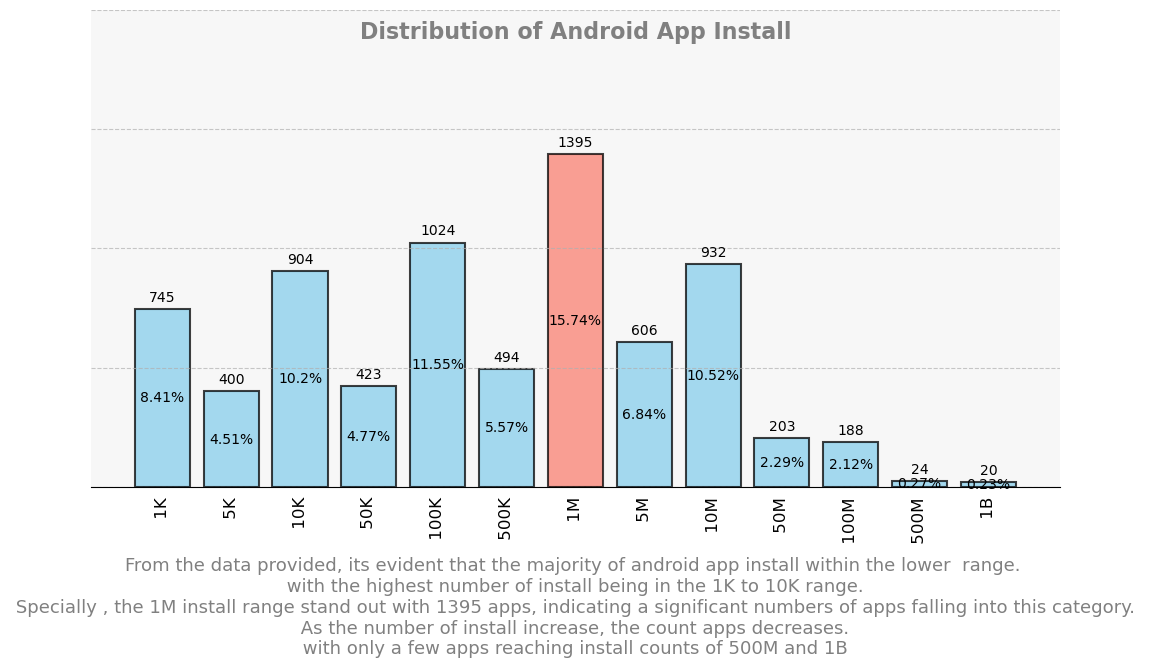

In [44]:
#Data
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_per.values

#Create stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color="skyblue",alpha=0.75, edgecolor="black", linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="")
plt.xticks(fontsize = 12)
plt.yticks(range(0, 2500, 500), [], fontsize = 12)
plt.tick_params(bottom = 0, left = 0)

#Find the category with the highest count
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

#adding data lebal and percentage inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, "%d" % int(height), ha = "center", va = "bottom", fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha = "center", va = "center", fontsize=10, color = "black")
    
#adding the background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#adding chart title inside plot
plt.text(0.5, 0.94, "Distribution of Android App Install", horizontalalignment = "center", fontsize = 16,
         transform = plt.gca().transAxes, color = "gray", fontweight = "bold")

#adding conclusion in the chart
plt.text(0.5, -0.35, '''From the data provided, its evident that the majority of android app install within the lower  range. \n with the highest number of install being in the 1K to 10K range. \n Specially , the 1M install range stand out with 1395 apps, indicating a significant numbers of apps falling into this category. \n As the number of install increase, the count apps decreases. \n with only a few apps reaching install counts of 500M and 1B ''' , horizontalalignment = "center", fontsize = 13, transform = plt.gca().transAxes, color = "gray")

#Remove Spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

#ax.set yticklables ([])
plt.tight_layout()

#plt.show()
plt.savefig("Top Android App Categories.png")

In [45]:
categories_android = android_final["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [46]:
pd.pivot_table(android_final, values = "Installs_int", index = "Category", aggfunc = "mean")

,Installs_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [47]:
#display dataframe without scientific rotation
pd.options.display.float_format = '{: .0f}'.format

In [48]:
categories_installs = pd.pivot_table(android_final, values = "Installs_int", index = "Category", aggfunc = "mean")
categories_installs = categories_installs.sort_values(by="Installs_int", ascending=False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION          38456119
VIDEO_PLAYERS          24727872
SOCIAL                 23253652
PHOTOGRAPHY            17805628
PRODUCTIVITY           16787331
GAME                   15560966
TRAVEL_AND_LOCAL       13984078
ENTERTAINMENT          11640706
TOOLS                  10682301
NEWS_AND_MAGAZINES      9549178
BOOKS_AND_REFERENCE     8767812
SHOPPING                7036877
PERSONALIZATION         5201483
WEATHER                 5074486
HEALTH_AND_FITNESS      4188822
MAPS_AND_NAVIGATION     4056942
FAMILY                  3694276
SPORTS                  3638640
ART_AND_DESIGN          1986335
FOOD_AND_DRINK          1924898
EDUCATION               1820673
BUSINESS                1712290
LIFESTYLE               1433676
FINANCE                 1387692
HOUSE_AND_HOME          1331541
DATING                   854029
COMICS                   817657
AUTO_AND_VEHICLES        647318
LIBRARIES_AND_DEMO       638504
PARENTING                542604
BEAUTY                   513152

In [49]:
#alphanumaric units
def alphanumeric_unit(value):
    if value >= 1e9:
        return f'{value / 1e9: .1f}B'
    elif value >= 1e6:
        return f'{value / 1e6: .1f}M'
    elif value >= 1e3:
        return f'{value / 1e3: .1f}K'
    else:
        return f'{value: .1f}'

In [50]:
categories_installs_unit = categories_installs.map(alphanumeric_unit)
categories_installs_unit

Category
COMMUNICATION            38.5M
VIDEO_PLAYERS            24.7M
SOCIAL                   23.3M
PHOTOGRAPHY              17.8M
PRODUCTIVITY             16.8M
GAME                     15.6M
TRAVEL_AND_LOCAL         14.0M
ENTERTAINMENT            11.6M
TOOLS                    10.7M
NEWS_AND_MAGAZINES        9.5M
BOOKS_AND_REFERENCE       8.8M
SHOPPING                  7.0M
PERSONALIZATION           5.2M
WEATHER                   5.1M
HEALTH_AND_FITNESS        4.2M
MAPS_AND_NAVIGATION       4.1M
FAMILY                    3.7M
SPORTS                    3.6M
ART_AND_DESIGN            2.0M
FOOD_AND_DRINK            1.9M
EDUCATION                 1.8M
BUSINESS                  1.7M
LIFESTYLE                 1.4M
FINANCE                   1.4M
HOUSE_AND_HOME            1.3M
DATING                  854.0K
COMICS                  817.7K
AUTO_AND_VEHICLES       647.3K
LIBRARIES_AND_DEMO      638.5K
PARENTING               542.6K
BEAUTY                  513.2K
EVENTS                  253.5K

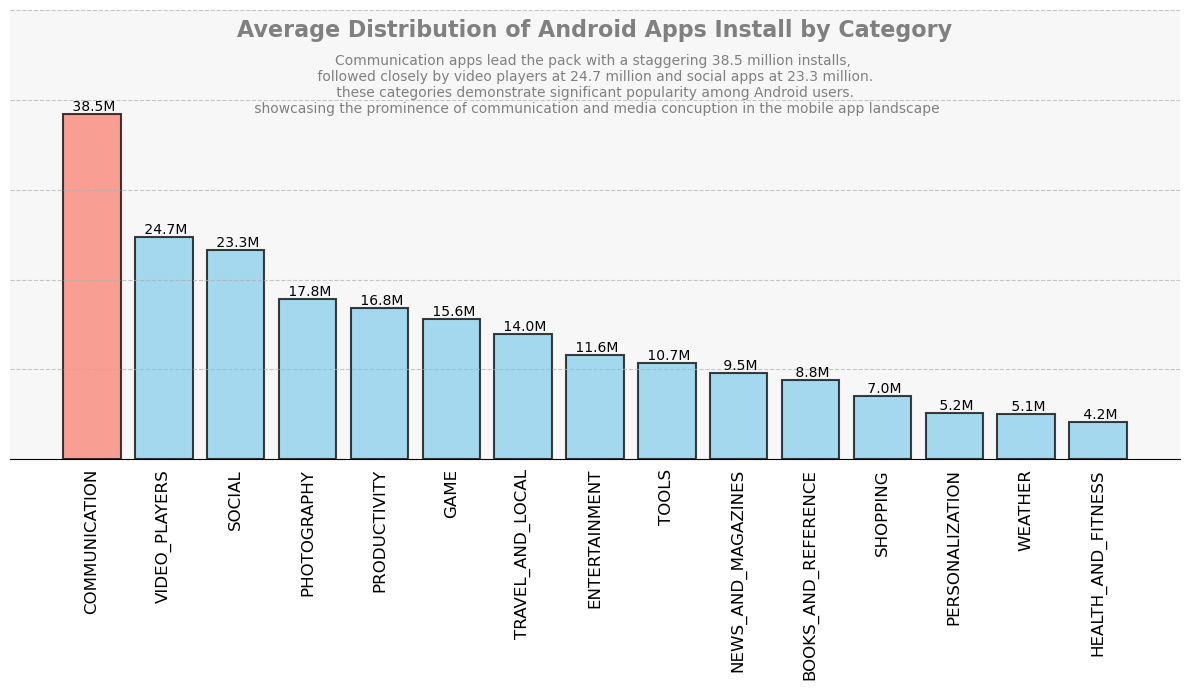

In [51]:
#Data
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

#Create stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color="skyblue",alpha=0.75, edgecolor="black", linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="")
plt.xticks(fontsize = 12)
plt.yticks(range(0, 60000000, 10000000), [], fontsize = 12)
plt.tick_params(bottom = 0, left = 0)

#Find the category with the highest count
max_count_category = categories[counts.argmax()]

#highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("salmon")
bars[max_count_index].set_edgecolor("black")

#adding data lebal and percentage inside each bar
for bar, units in zip(bars, categories_installs_unit.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 25, units, ha = "center", va = "bottom", fontsize=10)
    
#adding the background color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#adding chart title inside plot
plt.text(0.5, 0.94, "Average Distribution of Android Apps Install by Category", horizontalalignment = "center", fontsize = 16,
         transform = plt.gca().transAxes, color = "gray", fontweight = "bold")

#adding conclusion in the chart
plt.text(0.5, 0.77, '''Communication apps lead the pack with a staggering 38.5 million installs, \n followed closely by video players at 24.7 million and social apps at 23.3 million. \n these categories demonstrate significant popularity among Android users. \n showcasing the prominence of communication and media concuption in the mobile app landscape''' , horizontalalignment = "center", fontsize = 10, transform = plt.gca().transAxes, color = "gray")

#Remove Spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

#ax.set yticklables ([])
plt.tight_layout()

#plt.show()
plt.savefig("Top Android App Categories.png")

In [52]:
category_group = android_final.groupby("Category")

In [53]:
COMMUNICATION = category_group.get_group("COMMUNICATION").sort_values(by="Installs_int", ascending = False)
COMMUNICATION

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10672,FNH Payment Info,COMMUNICATION,NaN,0,2.1M,10+,Free,0,Everyone,Communication,"March 17, 2018",1.3,4.0.3 and up,10
10670,FN Web Radio,COMMUNICATION,NaN,0,1.6M,10+,Free,0,Everyone,Communication,"May 18, 2018",1.1,2.3 and up,10
10169,Test Server SMS FA,COMMUNICATION,NaN,0,1.8M,5+,Free,0,Everyone,Communication,"July 27, 2018",1.0,4.0.3 and up,5
6399,Of the wall Arapaho bk,COMMUNICATION,NaN,0,12M,5+,Free,0,Everyone,Communication,"August 18, 2017",1.0,4.1 and up,5


In [54]:
#alphanumaric units
def alphanumeric_unit(value):
    if value >= 1e9:
        return f'{value / 1e9: .0f}B'
    elif value >= 1e6:
        return f'{value / 1e6: .0f}M'
    elif value >= 1e3:
        return f'{value / 1e3: .0f}K'
    else:
        return f'{value: .1f}'

In [55]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [59]:
df = COMMUNICATION[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_unit)
df

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [60]:
df = category_group.get_group("VIDEO_PLAYERS").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_unit)
df

,App,Installs_int,Installs_int_unit
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [61]:
df = category_group.get_group("SOCIAL").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_unit)
df

,App,Installs_int,Installs_int_unit
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


In [62]:
df = category_group.get_group("PHOTOGRAPHY").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_unit)
df

,App,Installs_int,Installs_int_unit
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


## Analysis of photography category and potential for photo generation app in 2024 

## Conclusion

The analysis of the photography category reveal a notable trend in the popularity of photo editing and collage-making application, with several apps gamering over 100 million installs. This indicates a strong demand for photo-related functionalities among users.

Given observation , there appears to be significant potential for the development of a photo generation application in 2024. Such an app, offering promt and free generation of pictre and photo, could capitalize on the existing user interest in photography apps. By providing innovative features, easy usability, and high quality output, this application could stand out in the competitive market and attract a large user base.

Considering the success of existing photography apps and evolving prefernece of users, investing in the development of a photogeneration app seems promising for tapping into this lucrative market segment in 2024.